# Assignment 3 - Regression

Course "Data processing and Visualization", IE500417, NTNU. Fall 2020

https://www.ntnu.edu/studies/courses/IE500417

**Note: plagiarism is strictly forbidden! You should never copy any source code from other students. If you use any code written by others (except the standards libraries: NumPy, SciPy, Pandas, etc), provide a reference.**

**If the teachers see that your work is mostly copy+paste from online code snippets, the grade can be reduced.**

**If a case of plagiarism is detected, it will be reported to the administration.**

## Task description

In this assignment you will practice regression modelling. We will use a [data set on life expectancy from WHO]. It has been adjusted from the original datasets. The tasks will be to develop different regression models to predict life expectancy of different countries in different years based on their attributes:
1. Simple linear regresion: predict life expectancy with a given adult mortality
2. Calculate residual sum of squares (RSS) to assess model accuracy
3. Compare several polynomial models, find the one with the best RSS
4. Use multiple regression to predict life expectancy based on several features
5. Use Lasso regression to select a subset of features which are relevant for predicting life expectancy
6. Use Lasso regression to select a subset of specific size with most relevant features

## Submission details

The assignment must be handed in on Blackboard. The following must be handed in:
1. Report in PDF or HTML format describing the results of this assignment. Preferably, it is generated from the Jupyter notebook you used (Hint: In Jupyter: File > Download as > HTML). Alternatively (if you use plain Python or other tools), prepare a readable report that contains figures and source code snippets necessary to understand your work.
2. Source code that you used to generate the results. This could be the the Jupyter notebook file, python source files, Matlab files, etc.

Deadlines and grading information on Blackboard.

## Detailed steps

### Step 0: Prepare the data

In [468]:
import pandas as pd
import numpy as np
from scipy import stats

In [469]:
# Read CSV file from Life-Expectancy-Data

Life_data = pd.read_csv("Life-Expectancy-Data.csv")
print("Number of samples:", len(Life_data))

Number of samples: 2938


In [470]:
Life_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               2938 non-null   int64  
 1   Country                          2938 non-null   object 
 2   Year                             2938 non-null   int64  
 3   Status                           2938 non-null   object 
 4   Life_expectancy                  2938 non-null   float64
 5   Adult_Mortality                  2938 non-null   float64
 6   infant_deaths                    2938 non-null   int64  
 7   Alcohol                          2938 non-null   float64
 8   percentage_expenditure           2938 non-null   float64
 9   Hepatitis_B                      2938 non-null   int64  
 10  Measles                          2938 non-null   int64  
 11  BMI                              2938 non-null   float64
 12  under-five_deaths   

The ID attribute is not useful for processing. GDP and Population data are not complete. So, we remove them from the fields.

In [471]:
Life_data = Life_data.drop(["ID","GDP","Population"], axis="columns")

We will later need three sub-sets of data: training data, validation data (to select best lambda for parametrized models) and test data. We will split the data into these three subsets: 60% for training, 20% for validation, 20% for testing.

We use the DataFrame.sample() function to split the dataset. The `random_state` values are used for reproducibility. All the students should get the same three subsets of data. 

In [472]:
train_data = Life_data.sample(frac=0.6, random_state=12)
valid_and_test = Life_data.drop(train_data.index)
valid_data = valid_and_test.sample(frac=0.5, random_state=62)
test_data = valid_and_test.drop(valid_data.index)

Now we check the statistics for the original data and subsets.

In [473]:
Life_data["Life_expectancy"].describe()

count    2938.000000
mean       69.205412
std         9.530749
min        36.300000
25%        63.025000
50%        72.050000
75%        75.600000
max        89.000000
Name: Life_expectancy, dtype: float64

In [474]:
train_data["Life_expectancy"].describe()

count    1763.000000
mean       69.160976
std         9.521075
min        39.000000
25%        62.950000
50%        72.000000
75%        75.600000
max        89.000000
Name: Life_expectancy, dtype: float64

In [475]:
valid_data["Life_expectancy"].describe()

count    588.000000
mean      69.571939
std        9.366176
min       42.300000
25%       63.800000
50%       72.200000
75%       75.800000
max       89.000000
Name: Life_expectancy, dtype: float64

In [476]:
test_data["Life_expectancy"].describe()

count    587.000000
mean      68.971721
std        9.727240
min       36.300000
25%       63.100000
50%       72.000000
75%       75.400000
max       89.000000
Name: Life_expectancy, dtype: float64

Except the min and max values, Life expectancy are quite ok distributed in the subsets. 

Note: your algorithms should be efficient! For example, when you calculate RSS or create feature matrix (you will see that later), if you do the calculations element-by-element, you will have very slow code. You should use the power of Pandas and Numpy packages and do operations on lists directly. One example: if you want to create a new column called `c` in a dataframe which is a sum of two other columns `a` and `b`, this is a more efficient way:

In [477]:
# dataframe["c"] = dataframe["a"] + dataframe["b"]

This would also work (assuming that rows are indexed by numbers, not timestamps, etc), but will be much slower:

In [478]:
# dataframe["c"] = 0
# for i in range(len(dataframe)):
#    dataframe["c"][i] = dataframe["a"][i] + dataframe["b"][i]

### Step 1: Linear regression

**The task**: create a linear model that predicts life expectancy of a country at a year based on its adult mortality (attribute `Adult_Mortality`). 
Train the model on TRAINING data set!

When you are done, store the intercept and slope (weights w0 and w1) in variables `am_w0` and `am_w1` respectively.

In [479]:
# TODO - your code here
# ...

# Constructing linear data
x = train_data["Adult_Mortality"]
y = train_data["Life_expectancy"]
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

am_w0 = intercept
am_w1 = slope

In [480]:
print("Linear model: life expectancy = %f + %f * Adult_Mortality" % (am_w0, am_w1))

Linear model: life expectancy = 77.774280 + -0.524536 * Adult_Mortality


**Quiz questions**: 
1. Look at the data. How can you interpret the slope coefficient `am_w1`? It will probably be around -0.52. What does it mean?
2. What is the maximum life expectancy for this linear model to make sense?

**--- YOUR ANSWER HERE ---**<br>
1. Since the coefficient is negative, I will interpret it as, for every unit increase in Adult_Mortality, life expectancy decreases by an amount equal to the coefficient. This means that as Adult_Mortality increases, life expectancy value decreases.<br>
2. Maximum life expectancy is equal to 77.774280, i.e. when Adult_Mortality is equal to 0.

Now we can calculate predicted life expectancy and take a look at the regression line. First, we sort the values by mortality, to get a reasonable line in the plot.

In [481]:
train_am_sorted = train_data.sort_values("Adult_Mortality")
predicted_life = am_w0 + am_w1 * train_am_sorted["Adult_Mortality"]

In [482]:
import matplotlib.pyplot as plt
%matplotlib inline

In [483]:
# Plot a linear model that predicts life expectancy based on adult mortality
def plot_am_model(amr, predicted_life, observed_life):
    plt.figure(figsize=(5,5))
    plt.plot(amr, observed_life, "c.")
    plt.plot(amr, predicted_life, "k-")
    plt.xlabel("Adult mortality rate")
    plt.ylabel("Life expectancy, years")
    plt.plot()

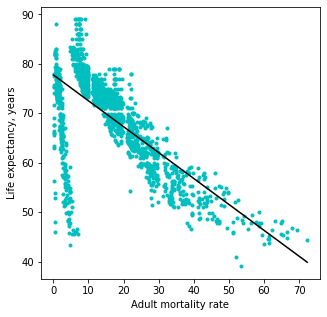

In [484]:
plot_am_model(train_am_sorted["Adult_Mortality"], predicted_life, train_am_sorted["Life_expectancy"])

### Step 2: Calculate residual sum of squares (RSS) to assess model accuracy

One way to estimate error for a given model is to calculate residual sum of squares (RSS). The general formula:

\begin{equation*}
 RSS = \sum_{i=1}^n r_i^2 = \sum_{i=1}^n (y_i - \hat{y}_i)^2
\end{equation*}

Where $r_i$ is the i-th residual, $y_i$ is the i-th observed output, $\hat{y}_i$ is the i-th output predicted by the model. 

In this simple case of linear regression with single input attribute:

\begin{equation*}
 RSS = \sum_{i=1}^n (y_i - (w_0 + w_1 * x_i))^2
\end{equation*}


But before we can calculate RSS, we need to calculate values predicted by our linear model.

**Your task:** Calculated life expectancy predicted by the linear model in the TEST data set. Hint: use "Adult_Mortality" column from `test_data` DataFrame.

In [485]:
# TODO - Your code here
predicted_test_life = am_w0 + am_w1 * test_data["Adult_Mortality"]

**Your task:** Write a function that calculates the residual sum of squares.

In [486]:
# Function that calculates residual sum of squares
# param y: the observer outputs
# param y_hat: the outputs predicted by a model
# return: RSS value, floating point
def rss(y, y_hat):
    sum_total = 0
    for index, value in y.items():
        sum_total += (value - y_hat[index])**2
    return sum_total       

Now we can calculate the RSS using test data set.

In [487]:
observed_test_life = test_data["Life_expectancy"]
rss_simple = rss(observed_test_life, predicted_test_life)
print("RSS for our linear model for TEST data: %e" % rss_simple)

RSS for our linear model for TEST data: 2.625196e+04


We can also look at the mean absolute error (MAE):
\begin{equation*}
 MAE = \frac{1}{n}\sum_{i=1}^n |y_i - \hat{y}_i|
\end{equation*}

In [488]:
# Calculate Mean Absolute error based on observed (sampled) and model-predicted life expectancy
# return: a floating point number
def MAE(observed_life, predicted_life):
    n = len(observed_life)
    differences = observed_life - predicted_life
    absolute_differences = differences.abs()
    return absolute_differences.sum() / n
    
mae = MAE(observed_test_life, predicted_test_life)
print("On average, our model predicts life expectancy %.1f years away from the observed value" % mae)

On average, our model predicts life expectancy 4.8 years away from the observed value


Although the error seems to be quite large in absolute numbers, if we look at the life expectancy and linear model chart above, it is not that surprising. The point cloud is wide and the line is indeed not a very accurate representation.

Let us do some unit-testing to check if you got expected results:

In [489]:
assert predicted_test_life.sum() >= 37000
assert predicted_test_life.sum() <= 42000

assert rss_simple >= 2.3e4
assert rss_simple <= 2.8e4

assert mae >= 4
assert mae <= 6

### Step 3: Compare several polynomial models, find the one with the best RSS

In this task we will look at polynomial relationships between adult mortality and life expectancy. To do that, we will create generated features. Feature h1 in the data will be $adult\_mortality$, h2 will be $adult\_mortality^2$, etc. We will prepare a feature matrix that we can use for regression calculations. 

**Task:** First, let's create a function that generates feature matrix containing polynomial with given powers of a single input attribute. For example, if we pass `adult_mortality` samples as input attribute and specify `powers=[1, 3, 4]`, then we should get a matrix with three columns out: $adult\_mortality, adult\_mortality^3, adult\_mortality^4 $.

In [490]:
# A function that takes one input feature and returns a matrix. Each column in the matrix is a power of the input attribute
# param input_attr_col - one column of data, input attribute samples. Either pandas.Series or Numpy array
# param powers - a list (array) containing the desired powers to be created
# 
# Return a DataFrame containing the feature matrix. Use column names h1, h2, h7, etc: hX means 
#  "input attribute to the power X"
def create_feature_matrix(input_attr_col, powers):
    # TODO - your code here
    df = pd.DataFrame()
    for i in range(len(powers)):
        df["h" + str(powers[i])] = input_attr_col ** powers[i]
    return df

Let's create some tests to see if the function works correctly. If the next code block fails to execute, you probably have an error in your `creat_feature_matrix` function.

In [491]:
a = np.array([1, 2, -5])
a1 = create_feature_matrix(a, [1])
a2 = create_feature_matrix(a, [1, 3, 5])
a3 = create_feature_matrix(a, [4, 2])

a1_exp = pd.DataFrame(data = {"h1" : a})
a2_exp = pd.DataFrame(data = {"h1" : a, "h3" : a ** 3, "h5": a ** 5})
a3_exp = pd.DataFrame(data = {"h4" : a ** 4, "h2" : a ** 2})

assert a1_exp.equals(a1)
assert a2_exp.equals(a2)
assert a3_exp.equals(a3)

We can also define a function that will predict outcomes based on input feature matrix and weights found by a model.

In [492]:
def predict(input_features, weights):
    # Prediction is a dot product of feature matrix and weight vector
    return input_features.dot(weights)

For convenience you can use this method to print the polynomial formula that you got:

In [493]:
# Take weights and intercept that the linear regression returned, print the resulting 
#   polynomial formula in a (relatively) nice way
# param weights: numpy array of weights w0, w1, w2, ..., wD (coefficients), in increasing order. 
# Note: the intercept is included here as well (as coefficient w0)
def poly_print(weights):
    print(np.poly1d(np.flip(weights, 0)))
    print("")

There is one tricky thing - it is easier to predict outcome if the intercept is also included in the feature matrix as a column with constant 1 as the values. To do that properly, make sure that:
1. When you create feature matrix, include 0 in the `powers` array. It will create a column with ones.
2. When fitting the model, notify the model that it does not have to calculate intercept explicitly. For example, if you use `sklearn.linear_model.LinarRegression.fit()` function, set parameter `fit_intercept=False`.

Now that we have the helper functions, we will create several polynomial regression models and find the best one. The degree of the polynomial is a parameter for our model. Therefore we will use the VALIDATION set when calculating, which polynomial gives the most accurate result. When we have found the best polynomial, we will evaluate its accuracy on the TEST data set.

**Task for you now**.
Variable `max_power` will iterate from 1 to 20. For each `max_power` value:
1. Generate feature matrix that contains the mortality rate of training data (`Adult_Mortality` column) polynomial with all powers from 1 to `max_power`. For example, if `max_power == 3`, you should have a feature matrix containing \[constant 1, $Adult\_Mortality$, $Adult\_Mortality^2$ and $Adult\_Mortality^3$\].
2. Fit a linear model using the feature matrix as input and life expectancy as predictable output. Hint: use [`sklearn.linear_model.LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
3. Predict output by the model on VALIDATION set. Hint: you need to generate a new feature matrix for the validation set.
4. Calculate RSS for the model on VALIDATION set.
5. Compare it with the best RSS found so far. If this RSS is better, save this model as the best one.

At the end of this procedure, save information about the best model:
1. Store minimum RSS in variable `best_rss`.
2. Store best polynomial degree (power) in variable `best_max_power`.
3. Store weights (coefficients) found by the model in variable `poly_weights`.
4. Calculate RSS for the best polynomial model on TEST data. Store it in variable `best_poly_rss`.

Then plot the observed samples and regression curve. Hint: for a better plot you may want to generate a list of increasing mortality values: from 0 to 70, with step 0.1 ([`numpy.arange()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.arange.html) function may be handy). Then generate a feature matrix from it and predict life expectancy based on your model. Then plot the life expectancy VS adult mortality.

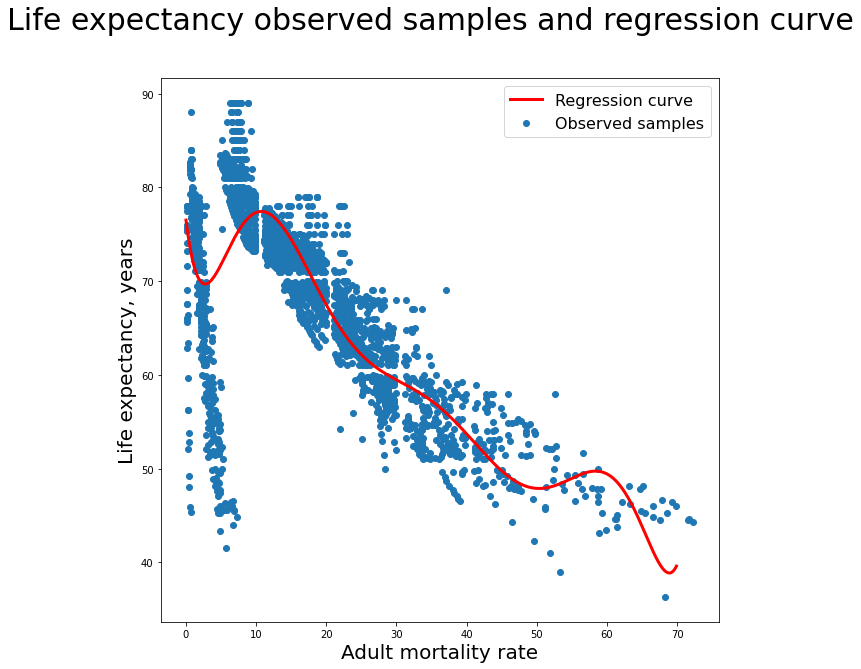

In [494]:
from sklearn.linear_model import LinearRegression
best_rss = None
best_max_power = None
poly_weights = None
for max_power in range(1, 21):
    # TODO - your code here
    # Create training feature matrix     
    train_feature_matrix = create_feature_matrix(train_data["Adult_Mortality"], range(max_power+1))
    model = LinearRegression(fit_intercept=False)
    model.fit(train_feature_matrix, train_data["Life_expectancy"])
    
    # Create validation feature matrix
    valid_feature_matrix = create_feature_matrix(valid_data["Adult_Mortality"], range(max_power+1))
    y = valid_data["Life_expectancy"]
    y_hat = pd.Series(model.predict(valid_feature_matrix), y.index)
    rss_value = rss(y, y_hat)
    if best_rss == None or rss_value < best_rss:
        best_rss = rss_value
        best_max_power = max_power
        poly_weights = model.coef_
    pass

y_test = test_data["Life_expectancy"]

# Create test feature matrix
test_feature_matrix = create_feature_matrix(test_data["Adult_Mortality"], range(best_max_power+1))

y_hat_test = predict(test_feature_matrix, poly_weights)

best_poly_rss = rss(y_test, y_hat_test)

# Data for plot

mortality_values = np.arange(0, 70, 0.1)
mortality_feature_matrix = create_feature_matrix(mortality_values, range(best_max_power+1))
life_expectancy = predict(mortality_feature_matrix, poly_weights)

# Plot

plt.figure(figsize=(10, 10))
plt.plot(mortality_values, life_expectancy, "r-", linewidth=3, label="Regression curve")
plt.scatter(Life_data["Adult_Mortality"], Life_data["Life_expectancy"], label="Observed samples")
plt.xlabel("Adult mortality rate", fontsize=20)
plt.ylabel("Life expectancy, years", fontsize=20)
plt.legend(fontsize=16)
plt.suptitle("Life expectancy observed samples and regression curve", fontsize=30)
plt.show()

In [495]:
print("Best model found for polynomial with degree %i" % (best_max_power))
print("It has RSS for TEST data: %e" % (best_poly_rss))
print("The polynomial:")
poly_print(poly_weights)

Best model found for polynomial with degree 8
It has RSS for TEST data: 1.884269e+04
The polynomial:
           8             7             6             5            4
1.347e-10 x - 3.872e-08 x + 4.552e-06 x - 0.0002814 x + 0.009762 x
           3         2
 - 0.1862 x + 1.737 x - 6.035 x + 76.5



Let's run some unit tests to see if your answer is according to the expectation:

In [496]:
assert best_max_power == 8

assert poly_weights[0] >= 76
assert poly_weights[0] <= 77
assert poly_weights[1] >= -7
assert poly_weights[1] <= -6
assert poly_weights[2] >= 1.7
assert poly_weights[2] <= 1.8
assert poly_weights[3] >= -0.19
assert poly_weights[3] <= -0.18
assert poly_weights[4] >= 0.009
assert poly_weights[4] <= 0.01

assert best_poly_rss >= 1.8e4
assert best_poly_rss <= 1.9e4

print ("All tests passed, the calculations are correct!")

All tests passed, the calculations are correct!


### Step 4: Use multiple regression to predict life expectancy based on several features

In this part you will predict life expectancy based on several attributes. 

**Do the following**:
1. Create a linear model of predicting life expectancy based on adult mortality and infant deaths (`Adult_Mortality` and `infant_deaths` columns). Fit the model on TRAINING data.
2. Calculate RSS for this model on VALIDATION data, store it in variable `adult_infant_rss`.
3. Create another model: use attributes `Adult_Mortality`, `infant_deaths` and `BMI`. Fit it on TRAINING data.
4. Calculate RSS for this model on VALIATION data, store it in variable `adult_infant_bmi_rss`.
5. Compare the accuracy (RSS values) of the two models. Which one provides higher accuracy on average?
6. There is a country in a certain year in the validation data with adult mortality 9.2, infant deaths 231, and attribute `BMI` is 28.1, life expectancy: 75.0 years old. What life expectancy do your two models predict for this country? Which model's predicted life expectancy is closer to the ground truth value (75.0)?
7. Calculate RSS of the best model on TEST data. Store it in variable `best_multi_rss`.

In [497]:
# Let's get the reference life expectancy
LE_75 = Life_data[(Life_data["Adult_Mortality"] == 9.2) & (Life_data["infant_deaths"] == 231) & (Life_data["BMI"] == 28.1)]
print("Reference Life: ")
LE_75

Reference Life: 


,Country,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,under-five_deaths,Polio,Total_expenditure,Diphtheria,HIV/AIDS,thinness_1-19_years,thinness_5-9 years,Income_composition_of_resources,Schooling
565,China,2010,Developing,75.0,9.2,231,5.75,5.660755,99,38159,28.1,268,99,4.89,99,0.1,4.2,3.6,0.691,12.5


In [498]:
# TODO - your code here


# Model(ai) using Adult_Mortality and infant_deaths columns
ai_model = LinearRegression();

x_ai = train_data[["Adult_Mortality", "infant_deaths"]]
y = train_data["Life_expectancy"]

ai_model.fit(x_ai, y)

ai_valid_data = valid_data[["Adult_Mortality", "infant_deaths"]]
y_hat_ai_valid = ai_model.intercept_ + predict(ai_valid_data, ai_model.coef_)
adult_infant_rss = rss(valid_data["Life_expectancy"], y_hat_ai_valid)

# Model(aib) using Adult_Mortality, infant_deaths and BMI columns
aib_model = LinearRegression();

x_aib = train_data[["Adult_Mortality", "infant_deaths", "BMI"]]

aib_model.fit(x_aib, y)

aib_valid_data = valid_data[["Adult_Mortality", "infant_deaths", "BMI"]]

y_hat_aib_valid = aib_model.intercept_ + predict(aib_valid_data, adult_infant_bmi_model.coef_)
adult_infant_bmi_rss = rss(valid_data["Life_expectancy"], y_hat_aib_valid)

print("5. 'adult_infant_model' rss value is", adult_infant_rss)
print("'adult_infant_bmi_model' rss value is", adult_infant_bmi_rss)

if adult_infant_rss < adult_infant_bmi_rss:
    best_model = "ai"
    print("'adult_infant_model' has higher accuracy")
else:
    best_model = "aib"
    print("'adult_infant_bmi_model' has higher accuracy")
    
LE_75_ai_prediction = ai_model.intercept_ + predict(LE_75[["Adult_Mortality", "infant_deaths"]], ai_model.coef_).item()
LE_75_aib_prediction = aib_model.intercept_ + predict(LE_75[["Adult_Mortality", "infant_deaths", "BMI"]], aib_model.coef_).item()

print()
print("6. 'adult_infant_model' predicted life expectancy is", LE_75_ai_prediction)
print("'adult_infant_bmi_model' predicted life expectancy is", LE_75_aib_prediction)

if abs(75 - LE_75_ai_prediction) < abs(75 - LE_75_aib_prediction):
    print("'adult_infant_model' predicted life expectancy is closer to the ground truth value")
else:
    print("'adult_infant_bmi_model' predicted life expectancy is closer to the ground truth value")

if best_model == "ai":
    y_hat_test = ai_model.intercept_ + predict(test_data[["Adult_Mortality", "infant_deaths"]], ai_model.coef_)
else:
    y_hat_test = aib_model.intercept_ + predict(test_data[["Adult_Mortality", "infant_deaths", "BMI"]], aib_model.coef_)

best_multi_rss = rss(test_data["Life_expectancy"], y_hat_test)

5. 'adult_infant_model' rss value is 25929.63324223518
'adult_infant_bmi_model' rss value is 20954.60024278271
'adult_infant_bmi_model' has higher accuracy

6. 'adult_infant_model' predicted life expectancy is 71.04223880588732
'adult_infant_bmi_model' predicted life expectancy is 69.75709873428167
'adult_infant_model' predicted life expectancy is closer to the ground truth value


**--- YOUR ANSWER HERE ---**<br>Answers are in the output of the above cell.

In [499]:
print("RSS for the best multi-attribute model on the TEST data: %e" % (best_multi_rss))

RSS for the best multi-attribute model on the TEST data: 2.150919e+04


### Step 5: Use Lasso regression to select a subset of features which are relevant for predicting life expectancy

In this step you will start with a long list of features, and try to eliminate non-relevant ones by using Lasso regression. You will try different lambdas, find the best lambda value.

First we define the starting set of features to use in our model.

In [500]:
all_features = ['Year',
                'Adult_Mortality', 
                'infant_deaths',
                'Alcohol', 'percentage_expenditure', 'Hepatitis_B', 
                'Measles', 'BMI', 'under-five_deaths',
                'Polio', 'Total_expenditure',
               'Diphtheria','HIV/AIDS','thinness_1-19_years','thinness_5-9 years',
                'Income_composition_of_resources', 'Schooling']

train_data_all = train_data[all_features]

**A warm-up task**: create a Lasso model with lambda=0.1 (set parameter `alpha=0.1` for the sklearn Lasso model).
To make the iterative calculation converge, use parameters `normalize=True` and `max_iter=100000` for the Lasso model.

Fit the model on training data, then evaluate RSS on VALIDATION data. Store the RSS in variable `lasso_warmup_rss`.

In [501]:
# TODO - your code here

from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=0.1, normalize=True, max_iter=100000)

lasso_model.fit(train_data_all, train_data["Life_expectancy"])

lasso_weights = lasso_model.coef_

y_hat_valid_lasso = lasso_model.intercept_ + predict(valid_data[all_features], lasso_weights)

lasso_warmup_rss = rss(valid_data["Life_expectancy"], y_hat_valid_lasso)

**Next task:** Find which attributes have non-zero weights, print out their names and weights. Hint: create a function `print_nonzero_weights`, you will need it later.

In [502]:
# TODO - your code here

def print_nonzero_weights(attributes, weights):
    print("Attributes having non-zero weights")
    nonzeros = weights.nonzero()
    for index in nonzeros[0]:
        print("Attribute index", index, ":", attributes[index], ", Weight:", weights[index])

print_nonzero_weights(all_features, lasso_weights)

Attributes having non-zero weights
Attribute index 1 : Adult_Mortality , Weight: -0.09827570255276617
Attribute index 16 : Schooling , Weight: 0.7122237664767335


Now you will find the best lambda parameter for this model. 

**Do the following**:
* Iterate over lambda values from 0.1 to 10000 (use the `penalties` array, already given, see below). For each lambda:
  * Train a Lasso model, using the given input features (`train_data_all`). Set `alpha` parameter to your lambda value,  and `normalize=True` to penalize all attributes equally. Remember parameter `max_iter=100000`.
  * Calculate RSS for the model on VALIDATION data set.
* Find out which lambda had the lowest RSS value, store it as variable `best_lambda`.
* Print the non-zero weights for this model. Print also the intercept.

Hint: do not use `lambda` as variable name, it is a reserved keyword in Python!

Hint #2: Don't be surprised that the best model will probably be with the lowest lambda. It just shows that leaving out certain features would not give a more accurate model.

**Reflection question:** Which of the 17 initial parameters was "discarded" by the Lasso regression as an insignificant attribute?

**--- YOUR ANSWER HERE ---**<br>None of the initial parameters were discarded.

In [503]:
penalties = np.logspace(-4, 3, num=30)
best_lambda = None
best_rss = None
best_model_weights = None
best_model_intercept = None
for l in penalties:
    # TODO - your code here
    
    lasso_model = Lasso(alpha=l, normalize=True, max_iter=100000)
    lasso_model.fit(train_data_all, train_data["Life_expectancy"])
    
    weights = lasso_model.coef_
    intercept = lasso_model.intercept_

    y_hat_valid_lasso = intercept + predict(valid_data[all_features], weights)
    
    lasso_rss = rss(valid_data["Life_expectancy"], y_hat_valid_lasso)
    
    if best_rss == None or lasso_rss < best_rss:
        best_rss = lasso_rss
        best_lambda = l
        best_model_weights = weights
        best_model_intercept = intercept
    pass

print_nonzero_weights(all_features, best_model_weights)
print()
print("Intercept of the best model:", best_model_intercept)

Attributes having non-zero weights
Attribute index 0 : Year , Weight: -0.022939597314720287
Attribute index 1 : Adult_Mortality , Weight: -0.177121463171658
Attribute index 2 : infant_deaths , Weight: 0.08617139893360623
Attribute index 3 : Alcohol , Weight: 0.08684854783971493
Attribute index 4 : percentage_expenditure , Weight: 0.0004517363720859089
Attribute index 5 : Hepatitis_B , Weight: -0.004537165525022631
Attribute index 6 : Measles , Weight: -2.204694130291409e-05
Attribute index 7 : BMI , Weight: 0.03918170087984007
Attribute index 8 : under-five_deaths , Weight: -0.06411971901305638
Attribute index 9 : Polio , Weight: 0.03236648069096893
Attribute index 10 : Total_expenditure , Weight: -0.06744152551101018
Attribute index 11 : Diphtheria , Weight: 0.030340758683275418
Attribute index 12 : HIV/AIDS , Weight: -0.5155996814396293
Attribute index 13 : thinness_1-19_years , Weight: -0.047970089059680816
Attribute index 14 : thinness_5-9 years , Weight: 0.0041437854561504886
Attr

In [504]:
# The best lambda should be 0.0001
assert best_lambda == 0.0001

### Step 6: Additional Lasso challenge

Sometimes you may want to select a limited number of attributes that predict the output reasonably well. 

**The task** in this step is to find a lambda such that the **number of non-zero weights is reduced to three**. You should try to get the lambda as small as possible, but don't go too far, it is ok to have a lambda that is reasonably close to the minimal possible. 

Hint: you will probably get the lambda around 0.0535.

Fit a model using Lasso regression and `train_data_all` features.

Print the names of attributes having non-zero weights, and print the weights as well.

In [505]:
# TODO - your code here

l = 0.045
step = 0.0001
lambda_value = None
weights = None
while True:
    lasso_model = Lasso(alpha=l, normalize=True, max_iter=100000)
    lasso_model.fit(train_data_all, train_data["Life_expectancy"])
    
    weights = lasso_model.coef_
    
    if len(weights.nonzero()[0]) == 3:
        lambda_value = l
        break
    
    l += step

print_nonzero_weights(all_features, weights)
print()
print("Lambda value:", lambda_value)

Attributes having non-zero weights
Attribute index 1 : Adult_Mortality , Weight: -0.15039409105658819
Attribute index 12 : HIV/AIDS , Weight: -0.24565588498976657
Attribute index 16 : Schooling , Weight: 1.1135126357785865

Lambda value: 0.053600000000000245


## Reflection 

Please reflect on the following questions:
1. How did the assignment go? Was it easy or hard? <br>It went well. It was not very hard. However, I had to repeatedly look through the learning materials in order to get a sense of the task.<br>
2. How many hours did you spend on it? <br>Around 10.<br>
3. What materials did you use to study the concepts necessary for the assignment? <br>Learning materials on blackboard and web search.<br>


## Hints

1. package `sklearn.linear_model` has all the functions you need to create [linear regression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html), [Ridge regression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) and [Lasso regression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html). Parameter lambda is called `alpha` in this package.
2. For a simple linear regression with one input attribute, it is easier to use [`scipy.stats.linregress`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html) function.